# Date patterns of flow

### Change in water level during given period of time

### The aim of this notebook is to research the patterns in the data concerning the level of the flow. As it can be noticed in the correlogram of the data hourly (range 0:100) there is a strong correlation and the values of the correlation are accordingly 0.761, 0.684, 0.672. As a result one may notice that there exists daily pattern in the given set in 24 hour cycle.

### defining necessary libraries

In [99]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf

### importing the data set

In [2]:
flow = pd.read_csv('../dataset/flow1.csv', parse_dates=['time'])
flow.head()

,time,flow
0,2015-06-01 14:15:00,115.559998
1,2015-06-01 14:20:00,115.199997
2,2015-06-01 14:25:00,112.209999
3,2015-06-01 14:30:00,112.860001
4,2015-06-01 14:35:00,113.349998


### basic statistics

In [35]:
print(flow.describe())

                flow
count  255419.000000
mean      109.166087
std        23.698688
min      -253.750000
25%        95.860001
50%       112.879997
75%       123.250000
max       599.869995


### converting the data type of time

In [3]:
flow['time'] = pd.to_datetime(flow['time'], format='%Y-%m-%d %H:%M:%S')
flow.head()

,time,flow
0,2015-06-01 14:15:00,115.559998
1,2015-06-01 14:20:00,115.199997
2,2015-06-01 14:25:00,112.209999
3,2015-06-01 14:30:00,112.860001
4,2015-06-01 14:35:00,113.349998


### creating variables

In [4]:
t = flow['time']
f = flow['flow']

### plotting one day

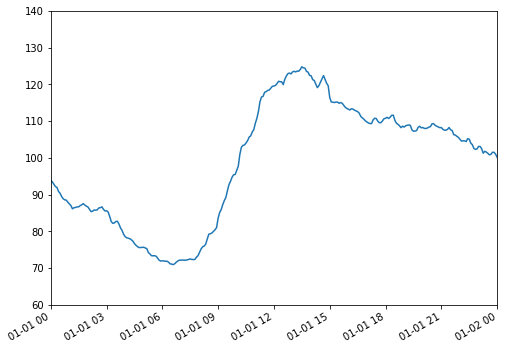

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 2, 0,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting first half of the day

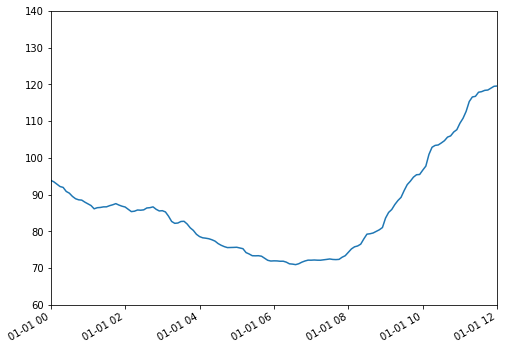

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 1, 12,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting second half of the day

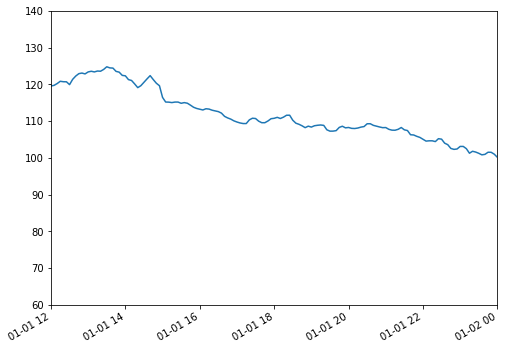

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 12,0), dt.datetime(2016, 1, 2, 0,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting two days 

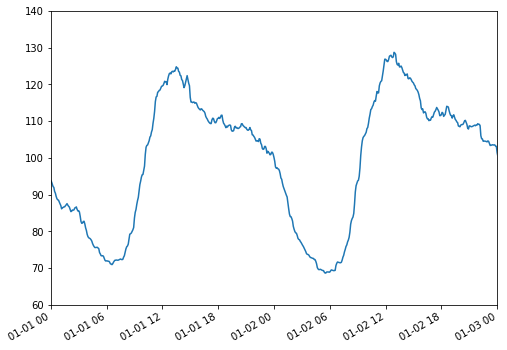

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 3, 0,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting one week

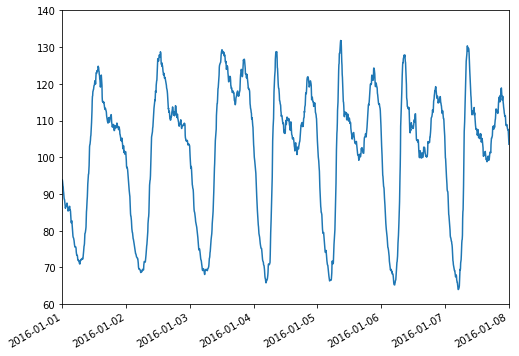

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 8, 0,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting two weeks

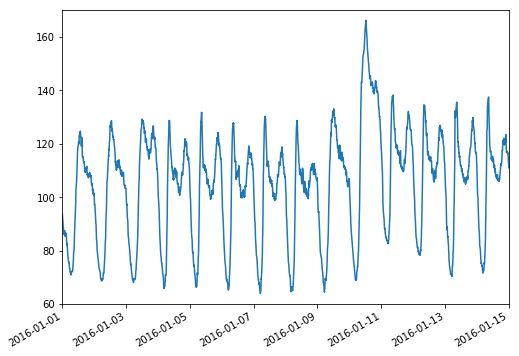

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 15, 0,0)])
ax.set_ylim(60, 170)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### variable with average hour value

In [14]:
flow.dtypes

time    datetime64[ns]
flow           float64
dtype: object

In [51]:
data_h = pd.read_csv('../dataset/flow1.csv', parse_dates={'time_h':['time']},index_col='time_h')
dayfirst=True
dataAvH = data_h.resample('60T').mean()

In [64]:
dataAvH

,flow
time_h,
2015-06-01 14:00:00,113.754443
2015-06-01 15:00:00,113.013333
2015-06-01 16:00:00,114.081666
2015-06-01 17:00:00,116.459167
2015-06-01 18:00:00,123.825000
2015-06-01 19:00:00,128.884998
2015-06-01 20:00:00,128.890832
2015-06-01 21:00:00,128.337498
2015-06-01 22:00:00,121.268333


### correlogram of the data hourly (range 0:100) which sums up the research of the pattern in the data

0.7610204617673005 0.6843144877145846 0.6715036337318498


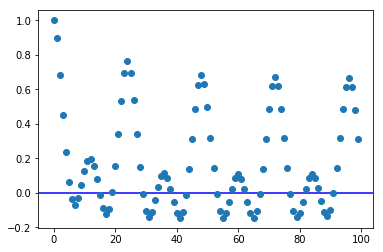

In [121]:
new_list = [dataAvH['flow'].autocorr(lag=i) for i in range(100)]
print(new_list[24], new_list[48], new_list[72])
plt.axhline(0, color='blue')
plt.plot(new_list,'o')

### correlogram of the data hourly (one day)

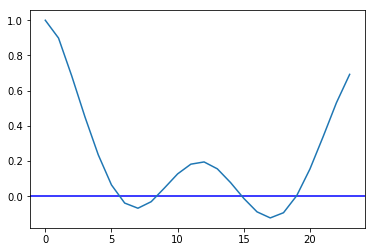

In [113]:
new_list = [dataAvH['flow'].autocorr(lag=i) for i in range(24)]
plt.axhline(0, color='blue')
plt.plot(new_list)

### correlogram of the data hourly (3 days)

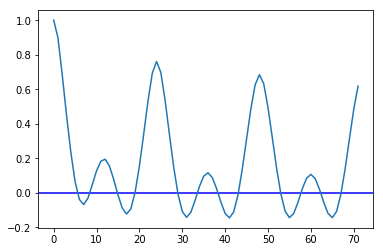

In [112]:
new_list = [dataAvH['flow'].autocorr(lag=i) for i in range(72)]
plt.axhline(0, color='blue')
plt.plot(new_list)

### correlogram of the data hourly (two weeks)

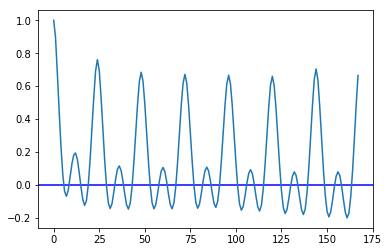

In [111]:
new_list = [dataAvH['flow'].autocorr(lag=i) for i in range(168)]
plt.axhline(0, color='blue')
plt.plot(new_list)

### correlogram of the fragment of the data hourly (0:100)

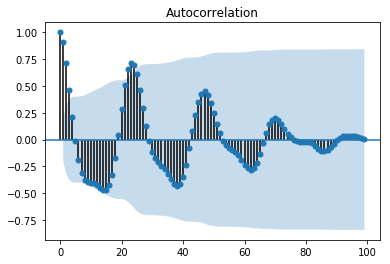

In [39]:
dataAvH_year = dataAvH['2016-01-01':'2016-12-31']
series = dataAvH_year[0:100]
plot_acf(series)
pyplot.show()